In [17]:
import numpy as np
import warp as wp


wp.init()
wp.config.mode = "debug"
from typing import Callable,Any
import matplotlib.pyplot as plt
from collections import deque
from pde_module.grids import NodeGrid
wp.init()
# wp.config.mode = "debug"


In [91]:
class LatticeUnits:
    cs: float = 1/(3.**0.5)
    
    def __init__(self,dx,density,dynamic_viscosity,u_ref,u_target = 0.1):
        self.dx = dx
        
        self.u_ref = u_ref
        self.u_target = u_target
        self.density = density
        self.dynamic_viscosity = dynamic_viscosity
        self.kinematic_viscosity = self.dynamic_viscosity/self.density
        
        self.cL = self.dx
        self.cU = self.u_ref/self.u_target
        self.cT = self.cL/self.cU
        self.cMu = self.cU*self.cL
        self.cRho = density
        
        
        self.dt = self.cT
        self.mu_lattice = self.kinematic_viscosity/self.cMu
        self.relaxation_factor = 3*self.mu_lattice+ 0.5
        
        self.Ma = u_target/self.cs
        
        assert self.Ma < 0.3, 'the lattice Mach number should be less than 0.3 ideally less than 0.1'
        assert 0.5 < self.relaxation_factor, 'relaxation factor must be greater than 0.5 for stability'
        
    

In [95]:
x = LatticeUnits(0.001,1,0.01,1,0.01)


x.relaxation_factor,x.mu_lattice,x.dt,x.cT

(0.8, 0.09999999999999999, 1e-05, 1e-05)

In [16]:
a = np.ones(shape = 3,dtype = np.int32)

b = wp.array(a)


@wp.kernel
def test(a:wp.array(dtype = int)):
    wp.atomic_exch(a,0,5)
    
wp.launch(test,dim = 1,inputs = [b])
print(b)

[5 1 1]


In [11]:
a = np.ones((1,1,1))
a[0,0,0]

np.float64(1.0)

In [ ]:
a=np.indices((3,4))

print(.)

AttributeError: 'numpy.ndarray' object has no attribute 'moveaxis'

In [4]:
a = (1,2)

np.meshgrid(np.linspace(0,1,5))

(array([0.  , 0.25, 0.5 , 0.75, 1.  ]),)

In [7]:
a = wp.array([1,2,3],dtype= int)

print(a)

b = a.view(dtype=float)
print(b)

[1 2 3]
[1.e-45 3.e-45 4.e-45]


In [ ]:

a = wp.vec3f(1.,1.,1.)
b = wp.mat(shape = (1,3),dtype = float)

c = wp.zeros(1,dtype=wp.vec3f)

vec3f([0.0, 0.0, 0.0])

In [ ]:
def create_vector_outer(len_a,len_b):

    @wp.func
    def outer_product(a:wp.vec(length = len_a,dtype = float),b:wp.vec(length = len_b,dtype = float)):
            
        mat = wp.mat(shape = (len_a,len_b),dtype = a.dtype)
        
        for i in range(len_a):
            mat[i] = a[i]*b
        return mat
    
    
    return outer_product

outer = create_vector_outer(3,3)

In [123]:
mat = wp.mat(shape = (3,3),dtype = float)
@wp.kernel
def test(a:wp.array(dtype=mat),
         x:wp.array(dtype=wp.vec3f),
         x1:wp.array(dtype=wp.vec3f)):
    
    i = wp.tid()
    
    # z1  = wp.vec3(1.,1.,1.)
    # z2  = wp.vec3(1.,1.,1.)
    # mat = wp.mat(shape = (3,3),dtype = float)
    # for i in range(3):
    #     mat[i] = z1[i]*z2
    
    a[0][0,0] = 4.
    # mat = outer(z1,z2)
    c = a[0][:,0]
    
    for i in range(3):
        x[i] = c[i]
    
    
    
    

In [ ]:
x = 1.
b = wp.zeros(shape = 1, dtype=mat)
b.fill_(2.)



x22= wp.zeros(shape = 1,dtype = wp.vec3f)
x22.fill_(2.)

x11= wp.zeros(shape = 1,dtype = wp.vec3f)
x11.fill_(1.)
print(x11.numpy())
wp.launch(test,1,[b,x11,x22])


print('hi')
print(b.numpy())


NameError: name 'mat' is not defined

In [15]:
0 == x

False

In [13]:
import inspect

class Example:
    def to_warp(self):
        print(inspect.currentframe().f_code.co_name)

Example().to_warp()


to_warp


In [2]:
wp.init()

Warp 1.9.0 initialized:
   CUDA Toolkit 12.8, Driver 12.6
   Devices:
     "cpu"      : "AMD64 Family 23 Model 113 Stepping 0, AuthenticAMD"
     "cuda:0"   : "NVIDIA GeForce RTX 2070 SUPER" (8 GiB, sm_75, mempool enabled)
   Kernel cache:
     \\?\C:\Users\John Su\AppData\Local\NVIDIA\warp\Cache\1.9.0


In [5]:
a = wp.vec3()

b = wp.array()
a._length_

3

In [ ]:
from math import prod

class Cells():
    volume:np.ndarray | wp.array
    shape:tuple[int]
    dimension:int
    
class StructuredCells(Cells):
    '''
    Stores info for structured non-uniform cells 
    '''
    def __init__(self,x,y,z,dimension):
        # assert dimension == 3
        self.dimension = dimension
        
        self.cell_center_x = self.get_midpoints(x)
        self.cell_center_y = self.get_midpoints(y)
        self.cell_center_z = self.get_midpoints(z)
        self.cell_center_coordinate_vectors = [self.cell_center_x,self.cell_center_y,self.cell_center_z]
        self.node_coordinate_vectors = [x,y,z]
        self.shape = tuple(len(coord) for coord in self.cell_center_coordinate_vectors)
        self.volume = self.get_cell_volume()
        
        
    @staticmethod
    def get_midpoints(arr):
        if len(arr) == 1:
            return arr
        return (arr[:-1] + arr[1:])/2.

    
    @property
    def area(self):
        if self.dimension ==2:
            return self.volume
        else:
            raise NameError('area attribute is only availiable for 2D grids')
    
    
    
    def get_cell_volume(self):
        
        diffs = []
        for i,coord_array in enumerate(self.node_coordinate_vectors[:self.dimension]):
            
            shape = [1 for _ in range(3)]
            shape[i] = -1
            
            diffs.append(np.diff(coord_array).reshape(shape))
        
        return diffs


class Faces():
    '''
    We represent Faces as a 1D array of all the faces -> Makes it a lot easier to generalise
    '''
    def __init__(self,cells:StructuredCells):
        self.cells = cells
        
    
        
        
        

In [99]:
x = np.linspace(0,1,3)

a = Strucutred3D(x,x,np.array([0.]),3)

In [93]:
np.diff(np.array([0.]))

array([], dtype=float64)

In [100]:
a.shape

(2, 2, 1)

In [96]:
prod(a.volume).shape

(2, 2, 0)

In [48]:
a = wp.vec3i(*(1,2,3))

In [51]:
a.__getitem__

<bound method vector.<locals>.vec_t.__getitem__ of vec3i([1, 2, 3])>

In [47]:
for i in a.__iter__():
    print(i)

AttributeError: 'vec3i' object has no attribute '__iter__'

In [3]:
# from pde_module.stencils.module.boundary import GridBoundary
x,y = np.linspace(0,1,3),np.linspace(0,1,3)
grid = NodeGrid(x,y)

IC = lambda x,y,z: (np.sin(np.pi*x)*np.sin(np.pi*y))

initial_value =grid.initial_condition(IC)
print(initial_value.shape)
# initial_value += 1.
levels = np.linspace(-0.15,1.05,100,endpoint=True)
to_plot = grid.trim_ghost_values(initial_value.numpy())
# plt.contourf(*grid.plt_meshgrid,to_plot[0,:,:,0],cmap = 'jet',levels = levels)
# plt.colorbar()
# plt.show()

t = 0

dx = x[1] - x[0]
dt = float(dx**2/(4*0.1))
grid.to_warp()



laplcian_stencil = Laplacian(grid,1,1,dynamic_array_alloc=False)
time_step = ForwardEuler(grid,1,buffer_size=1,dynamic_array_alloc= False)
boundary = GridBoundary(grid,1,1,dynamic_array_alloc= False)

(1, 5, 5, 1)


In [9]:
x = wp.array(boundary.interior_adjaceny,dtype= wp.vec3i)

(8,)

In [181]:
np.unique(boundary.interior_adjacency,axis =0,return_inverse= True)

(array([[-1, -1,  0],
        [-1,  0,  0],
        [-1,  1,  0],
        [ 0, -1,  0],
        [ 0,  1,  0],
        [ 1, -1,  0],
        [ 1,  0,  0],
        [ 1,  1,  0]], dtype=int32),
 array([7, 6, 5, 4, 3, 2, 1, 0]))

In [ ]:
a = []

#Faces
for i in range(3):
    for j in [1,-1]:
        vec = [0,0,0]
        vec[i] = j
        a.append(vec) 
    

In [ ]:
#Edges 4 edges per face
f = []

In [167]:
a

[[1, 0, 0], [-1, 0, 0], [0, 1, 0], [0, -1, 0], [0, 0, 1], [0, 0, -1]]

In [161]:
@wp.kernel
def test(arr:wp.array(dtype=wp.vec(length= 1,dtype= float))):
    i = wp.tid()

    a = 1.
    
    c = a + arr[0]
    
    
wp.launch(test,2,inputs= [b])

Module __main__ 4c1b53b load on device 'cuda:0' took 0.87 ms  (error)


WarpCodegenError: Error while parsing function "test" at C:\Users\John Su\AppData\Local\Temp\ipykernel_7280\793677396.py:7:
    c = a + arr[0]
;Couldn't find function overload for 'add' that matched inputs with types: [float32, vec1f]

In [ ]:

from pde_module.stencils import StencilModule 

class Boundary(StencilModule):
    def __init__(self, grid, num_outputs, levels = None, buffer_size = 0, dynamic_array_alloc = True, **kwargs):
        super().__init__(grid, num_outputs, levels, buffer_size, dynamic_array_alloc, **kwargs)
        
        self.groups = dict()
        self.indices_group= dict()
        self.get_boundary_indcies()
        self.get_indices()



    def get_indices(self):
        assert hasattr(self,"all_boundaries")
        for axis,axis_name in enumerate(['X','Y','Z'][:self.dimension]):
            
            coords = self.grid.coordinate_vectors[axis]
            axis_lim = [0,len(coords)-1]
            
            for axis_side,side in zip(axis_lim,['-','+']):
                name = side + axis_name
                self.groups[name] = np.argwhere(self.all_boundaries[:,axis] == axis_side)
                
        self.groups['ALL BOUNDARIES'] = np.arange(len(self.all_boundaries),dtype = np.int32)
        
        
    def get_boundary_indcies(self):
        boundaries = []
        for i,axis_name in enumerate(['X','Y','Z'][:self.dimension] ):
            coords = self.grid.coordinate_vectors[i]
            axis_lim = [0,len(coords)-1]
            
            for fixed_point in axis_lim:
                
                shape = list(self.grid.shape)
                shape[i] = 1
                
                indices = np.indices(shape,dtype = int)
                indices = np.moveaxis(indices,0,-1).reshape(-1,3)
                indices[:,i] += fixed_point
                
                boundaries.append(indices)
                
        
        self.all_boundaries = np.unique(np.concatenate(boundaries,dtype= int),axis = 0).astype(np.int32)
        self.boundary_type = -1*np.ones(shape = (len(self.all_boundaries),self.num_outputs),dtype=np.int32)
        self.boundary_value = np.zeros_like(self.boundary_type).astype(np.float32)
    
    
    def set_BC(self,face_ids,value,boundary_type,outputs_ids):
        
        
        if isinstance(face_ids,str):
            assert face_ids in self.groups.keys()
            face_ids = self.groups[face_ids]
        
        
        assert isinstance(face_ids,(np.ndarray,list,tuple))
        
        assert isinstance(outputs_ids,(int,list,tuple,np.ndarray)) or outputs_ids is None
        if outputs_ids is None:
            outputs_ids = slice(None)
        
        assert isinstance(value,float), 'Value must be type float'
        
        self.boundary_type[face_ids,outputs_ids] = boundary_type # For Dirichlet
        self.boundary_value[face_ids,outputs_ids] = value
        
    
    def dirichlet_BC(self,group,value,outputs_ids = None):
        self.set_BC(group,value,0,outputs_ids)        
    
    def vonNeumann_BC(self,group,value,outputs_ids = None):
        self.set_BC(group,value,1,outputs_ids)
        
    
    def forward(self,current_values): 
        wp.copy(dest = self.output_array(current_values), src =current_values)
        
        
    
    
    
    def to_warp(self):
        check_arr = self.boundary_type == -1
        if np.any(check_arr):
            raise ValueError(f'boundary ids {np.where(check_arr,check_arr)} do not have boundary types assigned to them')
        
        self.boundary_type = wp.array(self.boundary_type)
        self.boundary_value = wp.array(self.boundary_value)
        self.all_boundaries = wp.array(self.all_boundaries)
    
    
        
        
        
    
    
    

In [104]:
from pde_module.grids import NodeGrid

x,y = np.linspace(0,1,3),np.linspace(0,1,3)
grid = NodeGrid(x,y)
bound = Boundary(grid,1,1)



In [105]:
bound.get_boundary_indcies()
bound.dirichlet_BC('-X',1.)

In [106]:
bound.boundary_type,bound.boundary_value


(array([[ 0],
        [ 0],
        [ 0],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1]], dtype=int32),
 array([[1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32))

In [3]:
import numpy as np

Nx, Ny, Nz = 1000, 1000, 1000  # example shape

# Generate all indices
ix, iy, iz = np.indices((Nx, Ny, Nz))

# Boolean mask: True if on boundary
boundary_mask = (
    (ix == 0) | (ix == Nx-1) |
    (iy == 0) | (iy == Ny-1) |
    (iz == 0) | (iz == Nz-1)
)

# Extract indices as (N, 3) array
boundary_indices = np.argwhere(boundary_mask)

# print(boundary_indices)


In [47]:
a = np.ones(3)

np.pad(a,(0,5))

array([1., 1., 1., 0., 0., 0., 0., 0.])

In [30]:
xx = np.linspace(0,3,5)
yy = np.array([1.])

In [34]:
meshgrid = np.meshgrid(xx,yy,yy,indexing='ij')

In [41]:
a = (1,2,3)
a[1:]

(2, 3)

In [38]:
f = lambda x,y,z: np.stack([x,y,z],axis = -1)*500

In [39]:
f(*meshgrid).shape

(5, 1, 1, 3)

In [56]:
@wp.kernel
def test(a:wp.array(dtype=float),b:wp.array(dtype=float)):
    x,y = wp.tid()
    
    f = tuple([a,b])
    # for z in range(2):
    #     print(f[z]) 
    

In [57]:
a = wp.zeros(3,dtype=float)
b = wp.zeros(3,dtype=float)


wp.launch(test,1,[a,b])

Module __main__ 0f5cc77 load on device 'cuda:0' took 0.20 ms  (error)


WarpCodegenError: Error while parsing function "test" at C:\Users\John Su\AppData\Local\Temp\ipykernel_32136\2488175073.py:5:
    f = tuple([a,b])
;Construct `ast.List` not supported in kernels.

In [24]:
levels = 2

x = np.array([1,2,4])

y = x[::-1]

p = np.diff(y[0:levels+1])
q = np.cumsum(p)

y[0] - q

array([6, 7])

In [2]:
(1,1,1) == (1,1,1)

True

In [ ]:
b = wp.zeros(4,dtype=wp.vec3)



TypeError: Array.__mul__() missing 1 required positional argument: 'other'

In [40]:
a = np.zeros((2,1,3,1,1),dtype=float)


b = wp.from_numpy(a,dtype=wp.vec(length=1,dtype=float),shape = a.shape[:-1])
b.shape

(2, 1, 3, 1)

In [2]:
np.linspace(0,1,1)

array([0.])

In [3]:
np.meshgrid(np.linspace(0,1,2),np.linspace(0,1,1),np.linspace(0,1,1))

(array([[[0.],
         [1.]]]),
 array([[[0.],
         [0.]]]),
 array([[[0.],
         [0.]]]))

In [ ]:
import numpy as np
import warp as wp
from typing import Any
wp.init()

@wp.struct
class foo:
    x:float


@wp.kernel
def test(a:Any):
    i,j = wp.tid()
    
    c = foo()
    c.x = 1.    
    # a = wp.mat(shape = (3,3),dtype=float)
    b = wp.vec3(1.,2.,3.)    
    c = wp.vec3(1.,2.,3.)
    c += b
    
    
    
    
    # a[0] = b

    
# arr = wp.ones(shape = 2,dtype=wp.vec(length=1,dtype = float))

a = wp.mat(shape = (3,3),dtype=float)
a = wp.zeros(1,dtype=float)

wp.launch(test,dim = [1,1,1,1],inputs = [a])

Module __main__ cf86f61 load on device 'cuda:0' took 366.13 ms  (compiled)


In [23]:
a

vec3f([0.0, 0.0, 0.0])

Module __main__ 4ec8d4b load on device 'cuda:0' took 349.68 ms  (compiled)


In [13]:
import numpy as np
import warp as wp

wp.init()
wp.config.mode = "debug"

a = wp.ones(shape = (2,2),dtype=wp.vec(length=2,dtype = float))


In [14]:
a*1.

Module map_mul 00643d2 load on device 'cuda:0' took 217.76 ms  (error)


Exception: CUDA kernel build failed with error code 6

In [ ]:
wp.vec(length=1,dtype = float)

In [13]:
a*1.

array(shape=(2, 2), dtype=vec1f)

In [ ]:
@wp.func
def first_order_central_difference(x_h:Any,x:Any,x__h:Any,value_h:Any,value:Any,value__h:Any):
    return (value_h - value__h)/(x_h - x__h)

@wp.func
def first_order_forward_difference(x_h:Any,x:Any,value_h:Any,value:Any):
    return (value_h - value)/(x_h- x)

@wp.func
def first_order_backward_difference(x:Any,x__h:Any,value:Any,value__h:Any):
    return (value - value__h )/(x- x__h)

@wp.func
def second_order_central_difference(x_h:Any,x:Any,x__h:Any,value_h:Any,value:Any,value__h:Any):
    return (value_h - 2.*value - value__h)/(x_h-x)**2


wp.vector = wp.types.vector

In [ ]:

#Simple Diffusion Kernel
@wp.kernel
def diffusion2D(grid_points:wp.array2d(dtype = wp.vector(length=2,dtype=float)),current_values:wp.array2d(dtype = wp.vector(length=1,dtype=float)),new_values:wp.array2d(dtype = wp.vector(length=1,dtype=float)),dt:float):
    i,j = wp.tid() # Lets only do internal grid points
    
    x_id = i+1
    y_id = j+1
    
    current_point = grid_points[x_id,y_id]
    current_value = current_values[x_id,y_id][0]
    # # We organise points in terms of W,E, S,N , B,F
    
    x_adj = wp.vector(grid_points[x_id-1,y_id][0],grid_points[x_id+1,y_id][0])
    
    y_adj = wp.vector(grid_points[x_id,y_id-1][1],grid_points[x_id,y_id+1][1])
    
    val_x_adj = wp.vector(current_values[x_id-1,y_id][0],current_values[x_id+1,y_id][0])
    val_y_adj = wp.vector(current_values[x_id,y_id-1][0],current_values[x_id,y_id+1][0])

    print('hi')
    # d2fdx2 = second_order_central_difference(x_adj[1],current_point[0],x_adj[-1], val_x_adj[1],current_value,val_x_adj[0])
    # d2fdy2 = second_order_central_difference(y_adj[1],current_point,y_adj[-1],val_y_adj[1],current_value,val_y_adj[0])

    # new_values[x_id,y_id] = current_values[x_id,y_id] + dt*(d2fdx2 + d2fdy2)
    new_values[i,j][0] = 1.
    
    

    

In [184]:
grid.stencil_shape

(18, 18)

In [214]:
grid = Grid(np.linspace(0,1,20),np.linspace(0,1,20),num_outputs=1)

IC = lambda x: np.sin(np.pi*x[:,:,0])*np.sin(np.pi*x[:,:,1])


grid.initial_condition(IC)
grid.convert_to_warp()

wp.launch(diffusion2D,dim = grid.stencil_shape,inputs= grid.to_warp())

grid.val


Module __main__ b96763f load on device 'cuda:0' took 3.53 ms  (error)


AttributeError: Error while parsing function "diffusion2D" at C:\Users\John Su\AppData\Local\Temp\ipykernel_24696\2402533053.py:21:
    d2fdx2 = second_order_central_difference(x_adj[1],current_point[0],x_adj[-1], val_x_adj[1],current_value,val_x_adj[0])
;'NoneType' object has no attribute 'type'

In [208]:
grid.values[0].shape

(20, 20)

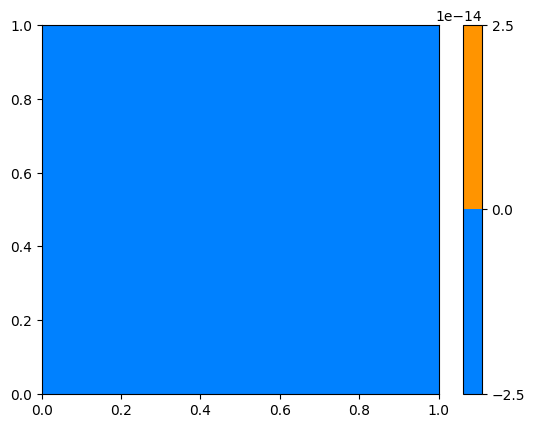

In [82]:
import matplotlib.pyplot as plt

plt.contourf(*grid.meshgrid,grid.values[1].squeeze(),cmap = 'jet')
plt.colorbar()

In [22]:
x = np.linspace(0,1,10)
y = np.linspace(0,1,10)
z = np.linspace(0,1,10)


X,Y = np.meshgrid(x,y,indexing='ij')

In [17]:
grid = np.stack([X,Y],axis = -1)
grid[0,2]

array([0.        , 0.22222222])